In [55]:
#Importing libraries

import pandas as pd
import numpy as n
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [82]:
data=pd.read_csv('Gold Price Predictor Data.csv')

In [57]:
data.head()
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,PLT_Price
1713,24-12-2018,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,20.700001,21.110001,20.650000,21.090000,21.090000,60507000,788.40
1714,26-12-2018,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,21.350000,21.400000,20.530001,20.620001,20.620001,76365200,799.25
1715,27-12-2018,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,20.840000,21.000000,20.700001,20.969999,20.969999,52393000,795.50
1716,28-12-2018,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,20.889999,21.020000,20.570000,20.600000,20.600000,49835000,790.25
1717,31-12-2018,120.980003,121.260002,120.830002,121.250000,121.250000,8449400,20.700001,21.129999,20.559999,21.090000,21.090000,53866600,801.40


In [58]:
data.shape

(1718, 14)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   GDX_Open       1718 non-null   float64
 8   GDX_High       1718 non-null   float64
 9   GDX_Low        1718 non-null   float64
 10  GDX_Close      1718 non-null   float64
 11  GDX_Adj Close  1718 non-null   float64
 12  GDX_Volume     1718 non-null   int64  
 13  PLT_Price      1718 non-null   float64
dtypes: float64(11), int64(2), object(1)
memory usage: 188.0+ KB


In [60]:
data.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
GDX_Open         0
GDX_High         0
GDX_Low          0
GDX_Close        0
GDX_Adj Close    0
GDX_Volume       0
PLT_Price        0
dtype: int64

In [61]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,PLT_Price
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,26.747427,27.071304,26.384575,26.715012,25.924624,4.356515e+07,1183.915425
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,10.620552,10.706388,10.490908,10.603110,9.886570,2.909151e+07,273.842095
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,12.700000,12.920000,12.400000,12.470000,12.269618,4.729000e+06,775.600000
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,20.642499,20.952500,20.355000,20.585000,20.180950,2.259968e+07,944.075000
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,23.115001,23.370001,22.870001,23.054999,22.677604,3.730465e+07,1098.025000
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,27.430001,27.770000,26.797500,27.317500,26.478154,5.697055e+07,1442.862500
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,57.520000,57.939999,56.770000,57.470001,54.617039,2.321536e+08,1737.600000


In [62]:
correlation=data.corr()

C:\Users\Sreeja Mondal\AppData\Local\Temp\ipykernel_19480\1603153744.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr()


ValueError: Format specifier missing precision

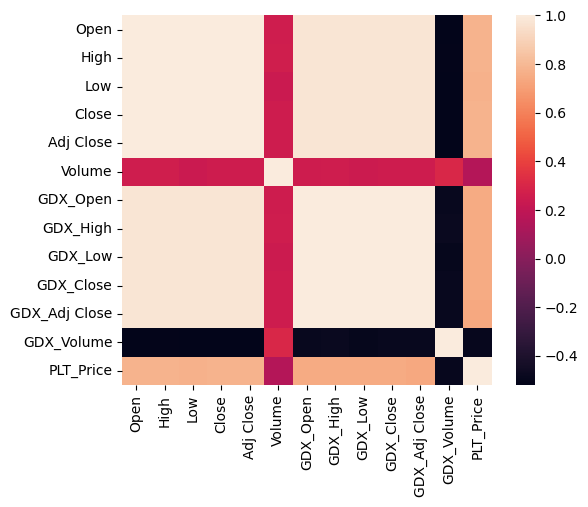

In [63]:

sns.heatmap(correlation,cbar=True,square=True,fmt='.if',annot=True,annot_kws={'size:8'})

In [ ]:
sns.scatterplot(x='GDX_Close',y='Close',data=data)

In [64]:
print(correlation)

                   Open      High       Low     Close  Adj Close    Volume  \
Open           1.000000  0.999515  0.999442  0.998976   0.998976  0.251921   
High           0.999515  1.000000  0.999262  0.999535   0.999535  0.261064   
Low            0.999442  0.999262  1.000000  0.999532   0.999532  0.237031   
Close          0.998976  0.999535  0.999532  1.000000   1.000000  0.246778   
Adj Close      0.998976  0.999535  0.999532  1.000000   1.000000  0.246778   
Volume         0.251921  0.261064  0.237031  0.246778   0.246778  1.000000   
GDX_Open       0.975510  0.975429  0.974725  0.974824   0.974824  0.250369   
GDX_High       0.975143  0.975722  0.974587  0.975255   0.975255  0.256498   
GDX_Low        0.975479  0.975650  0.975337  0.975561   0.975561  0.241727   
GDX_Close      0.974596  0.975341  0.974568  0.975459   0.975459  0.248752   
GDX_Adj Close  0.974098  0.974746  0.974182  0.974980   0.974980  0.250313   
GDX_Volume    -0.514230 -0.508782 -0.519988 -0.514616  -0.514616

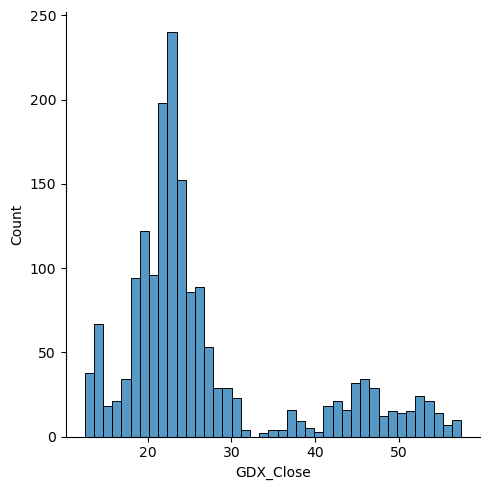

In [65]:
sns.displot(data['GDX_Close'])

In [66]:
X=data.drop(['Date','GDX_Close'],axis=1)
Y=data['GDX_Close']

In [67]:
print(X)
print(Y)

            Open        High         Low       Close   Adj Close    Volume  \
0     154.740005  154.949997  151.710007  152.330002  152.330002  21521900   
1     154.309998  155.369995  153.899994  155.229996  155.229996  18124300   
2     155.479996  155.860001  154.360001  154.869995  154.869995  12547200   
3     156.820007  157.429993  156.580002  156.979996  156.979996   9136300   
4     156.979996  157.529999  156.130005  157.160004  157.160004  11996100   
...          ...         ...         ...         ...         ...       ...   
1713  119.570000  120.139999  119.570000  120.019997  120.019997   9736400   
1714  120.620003  121.000000  119.570000  119.660004  119.660004  14293500   
1715  120.570000  120.900002  120.139999  120.570000  120.570000  11874400   
1716  120.800003  121.080002  120.720001  121.059998  121.059998   6864700   
1717  120.980003  121.260002  120.830002  121.250000  121.250000   8449400   

       GDX_Open   GDX_High    GDX_Low  GDX_Adj Close  GDX_Volum

In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)


# Model Training:Random Forest Regressor

In [69]:
regressor=RandomForestRegressor(n_estimators=100)

In [70]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [71]:
test_data_prediction=regressor.predict(X_test)

In [72]:
print(test_data_prediction)

[19.22249986 23.68629998 23.02790019 52.5158009  24.72019977 21.66480007
 22.93110032 46.48039955 22.83919977 44.0942007  20.60290014 22.14930017
 20.46300005 31.04360021 22.41200013 25.9656995  19.20660015 21.68819988
 20.43169999 18.79730013 44.19560015 57.01719917 20.1089     38.31779881
 16.51039995 22.53099992 24.36359988 47.70619986 27.1769999  13.3285
 21.15059989 30.85059997 20.26869966 46.19909948 15.1358     23.98959987
 18.43890015 22.27040015 23.36479976 26.16680014 19.21300019 30.3714004
 56.04830003 19.37260023 42.27929948 22.8733001  14.0862     50.03249985
 17.06529962 28.37819976 22.5831997  23.45269978 26.23329977 23.10300005
 24.09180018 20.7413004  26.61090024 22.70169998 30.01479992 22.5176998
 27.06819963 18.79300028 37.00160042 23.37419971 37.48880018 19.39739995
 23.57239968 24.29650012 24.5626     22.53590005 25.05060011 18.74649993
 37.87739921 23.68740032 47.90540098 22.71450004 13.7854     42.8172993
 19.04830015 26.88760007 24.28990004 18.96520013 14.2031  

# For comparing model:R squared error


In [73]:
error_score=metrics.r2_score(Y_test,test_data_prediction)

In [74]:
print(error_score)

0.9997882476623244


# Comparing Actual and Predicted Values

In [75]:
Y_test=list(Y_test)

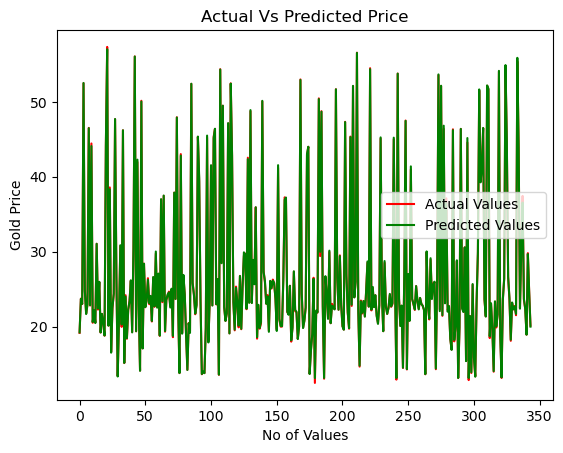

In [80]:
plt.plot(Y_test,color='Red',label='Actual Values')
plt.plot(test_data_prediction,color='green',label='Predicted Values')
plt.title('Actual Vs Predicted Price')
plt.xlabel('No of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()